In [52]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
path = 'C:/Users/Юлия/Desktop/Учеба/Анатолий Карпов/HomeWork/Project4/data'

In [77]:
#В этот фрейм в итоге попадут все фреймы из папок
df = pd.DataFrame()

#Прочитаем данные из всех папок и объеденим их в один ДатаФрейм
for current_path, dirs, files in os.walk(path):
    for file in files:
        #Создаем полный путь к файлу
        data_path = f'{current_path}/{file}'

        temp_df = pd.read_csv(data_path)
        
        #Достаем из пути имена и даты 
        part_path = current_path.split('\\')
        date = part_path[-2]
        name = part_path[-1]
        
        #Создаем колонки с именами date и name
        temp_df['date'] = date
        temp_df['name'] = name
        
        #Объедимяем ДатаФреймы
        df = pd.concat((df, temp_df))
#        print(df.shape)

In [78]:
df = df.drop(columns=['Unnamed: 0'])

In [79]:
df = df.reset_index(drop=True)

Сумма по колонке quantity?

In [80]:
df.quantity.sum()

480

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [81]:
df.groupby('name', as_index = False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) 

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [82]:
df.head()

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [83]:
best_product = df \
                .groupby('product_id', as_index=False) \
                .agg({'quantity' : 'sum'}) \
                .sort_values('quantity', ascending=False) \
                .head(10)

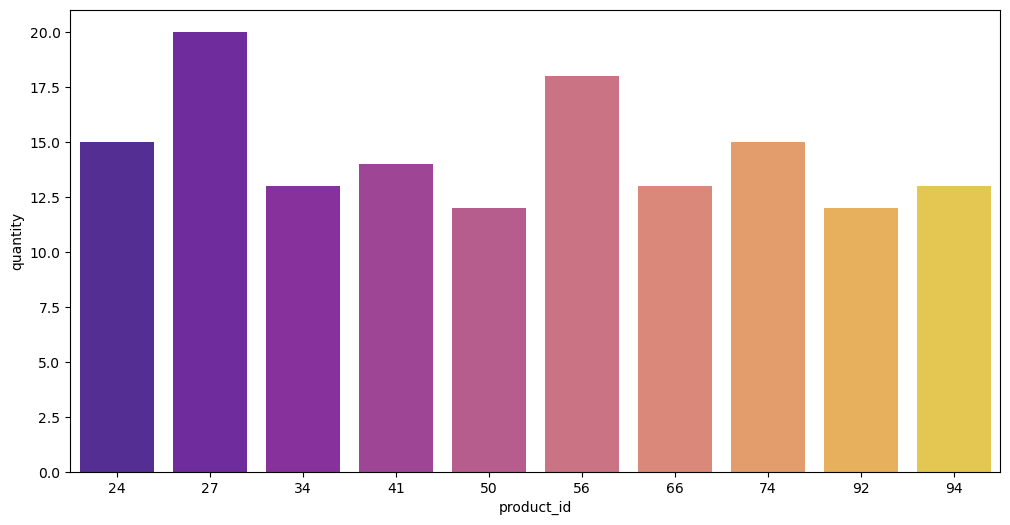

In [98]:
plt.figure(figsize=(12,6))

sns.barplot(data=best_product, 
            x='product_id', 
            y='quantity', 
            palette ='plasma',
            alpha=0.9);

Визуализируйте продажи по дням.

In [97]:
df.head()

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov


In [95]:
sells_day = df.groupby('date', as_index=False) \
              .agg({'quantity':'sum'})  

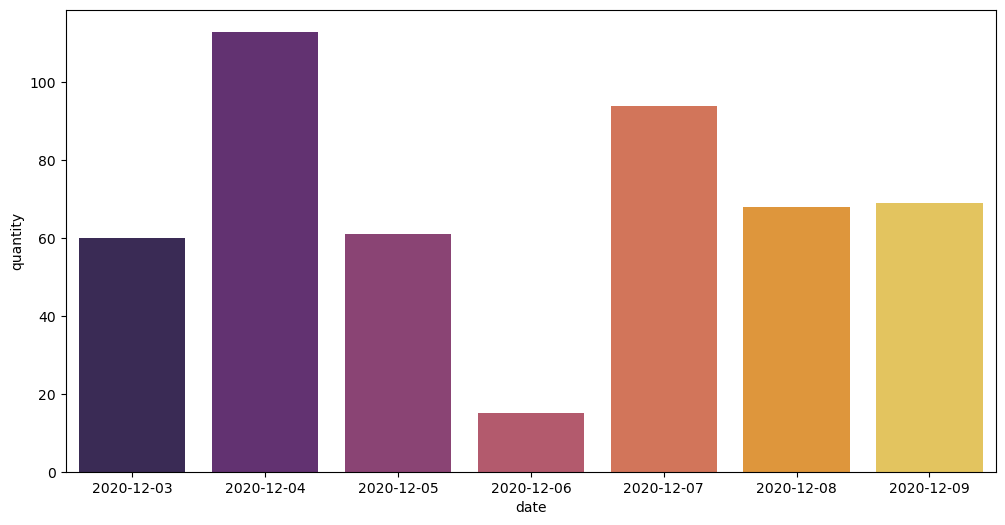

In [96]:
plt.figure(figsize=(12,6))

sns.barplot(data=sells_day, 
            x='date', 
            y='quantity', 
            palette ='inferno',
            alpha=0.9);

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза в разные дни)? 

In [108]:
df.groupby(['name', 'product_id'], as_index=False) \
    .agg({'date': pd.Series.nunique}) \
    .query('date > 1') \
    .rename(columns={'date':'count_days'})

,name,product_id,count_days
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
